# INM 702 Coursework Code: Task 2
## Implementation of Inverted dropout on forward and backward pass
### By: Jasveen Kaur and Nikhil Vallakati

Importing the necessary packages for matrix computation

In [10]:
import numpy as np
import matplotlib.pyplot as plt

Defining a function to implement inverted dropout:

In [2]:
def inverted_drop(self, p, x):
        #dropout mask
        idropout_mask = (np.random.rand(*x.shape) < p) / p 
        x *= idropout_mask
        return x

Defining a sample input array (6x3) along with its label (6x1) (same as task 1) to implement forward and backward pass:

In [3]:
input_set = np.array([[0,1,0],
                      [0,0,1],
                      [1,0,0],
                      [1,1,0],
                      [1,1,1],
                      [0,1,1],])#Dependent variable
labels = np.array([[1,
                    0,
                    0,
                    1,
                    1,
                    0,]])
labels = labels.reshape(6,1)

Forward and backward pass on the above defined array, with Relu on input layer, sigmoid on output layer and dropout on the hidden layer of the forward pass:

In [19]:
class neural_network(object):

    def __init__(self, n_hidden, epochs, lr, seed):

        self.random = np.random.RandomState(seed)
        self.n_hidden = n_hidden
        self.epochs = epochs
        self.lr = lr
        self.seed = seed
        
    #sigmoid activation function   
    def sigmoid(self, x):
        return 1/(1+np.exp(-x))
    
    #relu activation function
    def relu(self, x):
        return np.maximum(0, x) 
    
    #derivative of relu activation function(element)
    def relu_d_element(self, x):
        if x > 0:
            return 1
        elif x <= 0:
            return 0
    
    #derivative of relu activation function(array)
    def relu_d_array(self, x):
        x[x<=0] = 0
        x[x>0] = 1
        return x
    
    #Inverted dropout function definition
    def inverted_drop(self, p, x):
        idropout_mask = (np.random.rand(*x.shape) < p) / p #dropout mask. Notice /p!
        x *= idropout_mask
        return x
    
    #forward pass
    def forward_pass(self, X):
        
        z1 = np.dot(X, self.w1) + self.b1
        a1 = self.relu(z1)
        a1_drop = self.inverted_drop(0.8,a1) 

        z_out = np.dot(a1_drop, self.w_out) + self.b_out
        a_out = self.sigmoid(z_out)
        
        return z1, a1, z_out, a_out   

    #computing the loss
    def compute_cost(self, y_enc, a_out):
        term1 = a_out - y_enc 
        cost = term1.sum()
        return cost
    
    #predicting the output
    def predict_out(self, X):
        z1, a1,z_out, a_out = self.forward_pass(X)
        y_pred = np.argmax(a_out, axis=1)
        return y_pred
    
    #calculating the accuracy 
    def accuracy(self, y, y_pred, X):
        return ((np.sum(y.T == y_pred)).astype(np.float) / X.shape[0])
    
    def train(self, X_train, y_train):
        
        n_output = np.unique(y_train).shape[0]  # number of labels
        n_features = X_train.shape[1]

         #Initializing the weights
        
        #hidden layer
        self.b1 = np.zeros(self.n_hidden)
        self.w1 = self.random.normal(loc=0.0, scale=0.1,size=(n_features, self.n_hidden))
        
        #output layer
        self.b_out = np.zeros(n_output)
        self.w_out = self.random.normal(loc=0.0, scale=0.1, size=(self.n_hidden, n_output))
        
        self.results = {'cost': [], 'train_acc': []}  
        
        #training epochs
        for i in range(self.epochs):
            
            # forward propagation
            z1, a1, z_out, a_out = self.forward_pass(X_train)
            
            # Backpropagation
            sigma_out = a_out - labels #sigma_out.sum() = error
            relu_derivative = self.relu_d_array(a1)
            sigma_h1 = (np.dot(sigma_out, self.w_out.T) * relu_derivative)
                
            grad_w1 = np.dot(X_train.T, sigma_h1)
            grad_b1 = np.sum(sigma_h1, axis=0)

            grad_w_out = np.dot(a1.T, sigma_out)
            grad_b_out = np.sum(sigma_out, axis=0)

            delta_w1 = grad_w1
            delta_w_out = grad_w_out  
            delta_b1 = grad_b1
            delta_b_out = grad_b_out
             
            #updating the weights
            self.w1 -= self.lr * delta_w1
            self.w_out -= self.lr * delta_w_out

            self.b1 -= self.lr * delta_b1           
            self.b_out -= self.lr * delta_b_out

        
            #evaluating the trained model with updated weights      
            z1, a1, z_out, a_out = self.forward_pass(X_train)
            
            cost = self.compute_cost(y_enc=labels, a_out=a_out)
            y_train_pred = self.predict_out(X_train)

            train_acc = self.accuracy(y_train, y_train_pred, X_train)
            
            print("epoch:", i+1)
            print("Accuracy:","{:.2f}".format(train_acc*100),"% ||","loss:","{:.3f}".format(cost))
            
            self.results['cost'].append(cost)
            self.results['train_acc'].append(train_acc)
            
        return self


Initializing the parameters and propagating through one layer network

In [21]:
Model = neural_network(n_hidden=7, epochs=100, lr=0.0005, seed=1)
Model.train(X_train=input_set, 
       y_train=labels)

epoch: 1
Accuracy: 83.33 % || loss: 0.016
epoch: 2
Accuracy: 50.00 % || loss: 0.010
epoch: 3
Accuracy: 83.33 % || loss: 0.006
epoch: 4
Accuracy: 66.67 % || loss: 0.011
epoch: 5
Accuracy: 66.67 % || loss: 0.017
epoch: 6
Accuracy: 100.00 % || loss: 0.014
epoch: 7
Accuracy: 66.67 % || loss: 0.013
epoch: 8
Accuracy: 66.67 % || loss: 0.008
epoch: 9
Accuracy: 66.67 % || loss: 0.015
epoch: 10
Accuracy: 66.67 % || loss: 0.005
epoch: 11
Accuracy: 66.67 % || loss: 0.019
epoch: 12
Accuracy: 83.33 % || loss: -0.003
epoch: 13
Accuracy: 66.67 % || loss: 0.022
epoch: 14
Accuracy: 66.67 % || loss: -0.002
epoch: 15
Accuracy: 66.67 % || loss: -0.009
epoch: 16
Accuracy: 66.67 % || loss: 0.011
epoch: 17
Accuracy: 66.67 % || loss: 0.004
epoch: 18
Accuracy: 83.33 % || loss: 0.006
epoch: 19
Accuracy: 66.67 % || loss: 0.007
epoch: 20
Accuracy: 66.67 % || loss: 0.011
epoch: 21
Accuracy: 83.33 % || loss: 0.015
epoch: 22
Accuracy: 66.67 % || loss: 0.025
epoch: 23
Accuracy: 100.00 % || loss: 0.003
epoch: 24
Accur

The accuracy fluctuates after a few epochs. It fluctuates with given values: 50, 66.67, 83.33, 100 for 200 epochs.

Graph for the loss function¶

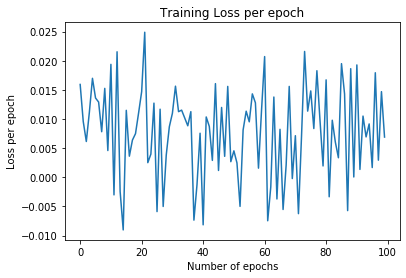

In [22]:
plt.plot(range(Model.epochs), Model.results['cost'])
plt.ylabel('Loss per epoch')
plt.xlabel('Number of epochs')
plt.title('Training Loss per epoch')
plt.show()

Graph for the Accuracy¶

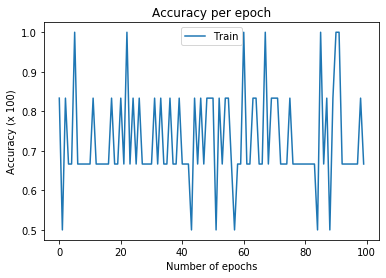

In [23]:
plt.plot(Model.results['train_acc'], 
         label='Train')
plt.ylabel('Accuracy (x 100)')
plt.xlabel('Number of epochs')
plt.legend()
plt.title('Accuracy per epoch')
plt.show()